In [189]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [190]:
marvel = pd.read_csv('marvel-wikia-data.csv')
dc =  pd.read_csv('dc-wikia-data.csv')

In [92]:
print(marvel.shape)
print(dc.shape)

(16376, 13)
(6896, 13)


In [93]:
marvel.head(3)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0


In [94]:
dc.tail(3)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
6893,283478,William Harrison (New Earth),\/wiki\/William_Harrison_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6894,283471,William McKinley (New Earth),\/wiki\/William_McKinley_(New_Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
6895,150660,Mookie (New Earth),\/wiki\/Mookie_(New_Earth),Public Identity,Bad Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN


# a.     Comparison between Marvel and DC

Comparision on number of Characters

In [98]:
marvel['name'].nunique()

16376

In [99]:
dc['name'].nunique()

6896

Comparision on Id count

In [105]:
marvel_grouped = marvel.groupby('Year')['page_id'].count().reset_index()
marvel_grouped.head(3)

,Year,page_id
0,1939.0,69
1,1940.0,221
2,1941.0,207


In [106]:
dc_grouped = dc.groupby('YEAR')['page_id'].count().reset_index()
dc_grouped.head(3)

,YEAR,page_id
0,1935.0,1
1,1936.0,9
2,1937.0,4


In [114]:
Merged_data = pd.merge(marvel_grouped,dc_grouped, how='outer', left_on='Year', right_on='YEAR')
Merged_data.head(2)

,Year,page_id_x,YEAR,page_id_y
0,1939.0,69.0,1939.0,18
1,1940.0,221.0,1940.0,64


In [115]:
Merged_data.shape

(79, 4)

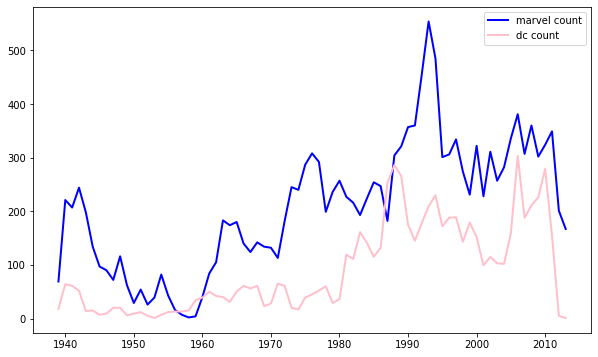

In [117]:
plt.figure(figsize=(10,6))
plt.plot(Merged_data['Year'], Merged_data['page_id_x'], label='marvel count', linewidth=2, color='blue')
plt.plot(Merged_data['Year'], Merged_data['page_id_y'], label='dc count', linewidth=2, color='pink')
plt.legend()

# b.   Most Popular Character from Marvel and DC

A - Spider-Man (Peter Parker) from Marvel and Batman (Bruce Wayne) from dc

In [122]:
marvel[marvel['APPEARANCES']==marvel['APPEARANCES'].max()]

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0


In [123]:
dc[dc['APPEARANCES']==dc['APPEARANCES'].max()]

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0


# c.     Are Bisexual and Gay Superheroes Popular.

A - No

In [127]:
marvel_groupbysex = marvel.groupby('SEX')['name'].count().reset_index()
marvel_groupbysex.head()

,SEX,name
0,Agender Characters,45
1,Female Characters,3837
2,Genderfluid Characters,2
3,Male Characters,11638


In [128]:
dc_groupbysex = dc.groupby('SEX')['name'].count().reset_index()
dc_groupbysex.head()

,SEX,name
0,Female Characters,1967
1,Genderless Characters,20
2,Male Characters,4783
3,Transgender Characters,1


# d.    How Women Superheroes are trending: Growing or Declining

A - Marvel - Female appearances increasing till 1980(around) and then decreasing
    dc - Female appearances increasing till 1989(aound) and then decreasing

In [138]:
marvel_groupbysex = marvel.groupby(['SEX', 'Year'])['APPEARANCES'].sum().reset_index()
marvel_groupbysex = marvel_groupbysex.sort_values('Year')
marvel_groupbysex.head(10)

,SEX,Year,APPEARANCES
100,Male Characters,1939.0,884.0
25,Female Characters,1939.0,124.0
26,Female Characters,1940.0,331.0
101,Male Characters,1940.0,1783.0
102,Male Characters,1941.0,5315.0
27,Female Characters,1941.0,45.0
103,Male Characters,1942.0,363.0
28,Female Characters,1942.0,24.0
104,Male Characters,1943.0,368.0
29,Female Characters,1943.0,166.0


In [139]:
marvel_groupbysex_female =marvel_groupbysex[marvel_groupbysex['SEX']=='Female Characters']

In [141]:
marvel_groupbysex_female.head(5)

,SEX,Year,APPEARANCES
25,Female Characters,1939.0,124.0
26,Female Characters,1940.0,331.0
27,Female Characters,1941.0,45.0
28,Female Characters,1942.0,24.0
29,Female Characters,1943.0,166.0


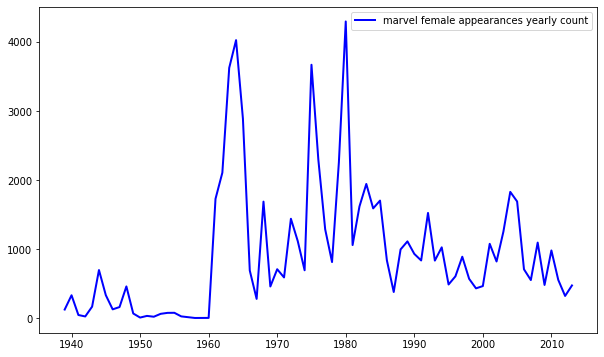

In [148]:
plt.figure(figsize=(10,6))
plt.plot(marvel_groupbysex_female['Year'], marvel_groupbysex_female['APPEARANCES'], label='marvel female appearances yearly count', linewidth=2, color='blue')
# plt.plot(dc_groupbysex_female['YEAR'], dc_groupbysex_female['APPEARANCES'], label='dc female appearances yearly count', linewidth=2, color='pink')
plt.legend()

In [144]:
dc_groupbysex = dc.groupby(['SEX', 'YEAR'])['APPEARANCES'].sum().reset_index()
dc_groupbysex = dc_groupbysex.sort_values('YEAR')
dc_groupbysex.head(5)

,SEX,YEAR,APPEARANCES
85,Male Characters,1935.0,125.0
0,Female Characters,1936.0,28.0
86,Male Characters,1936.0,212.0
1,Female Characters,1937.0,11.0
87,Male Characters,1937.0,447.0


In [145]:
dc_groupbysex_female =dc_groupbysex[dc_groupbysex['SEX']=='Female Characters']

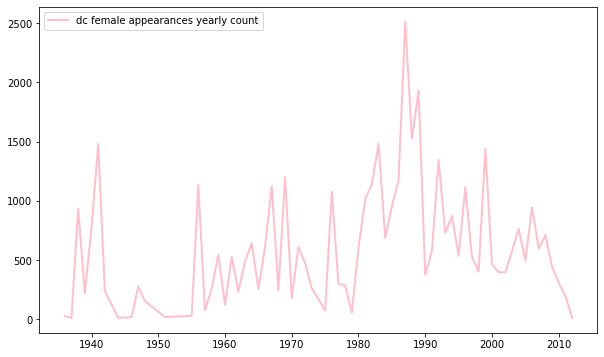

In [149]:
plt.figure(figsize=(10,6))
plt.plot(dc_groupbysex_female['YEAR'], dc_groupbysex_female['APPEARANCES'], label='dc female appearances yearly count', linewidth=2, color='pink')
plt.legend()

# e.    Which are the Most Important Factors related to a Popular Character

In [150]:
marvel.head(3)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0


In [152]:
marvel['ALIGN'].unique()

array(['Good Characters', 'Neutral Characters', 'Bad Characters', nan],
      dtype=object)

In [159]:
marvel['EYE'].unique()

array(['Hazel Eyes', 'Blue Eyes', 'Brown Eyes', 'Green Eyes', 'Grey Eyes',
       'Yellow Eyes', 'Gold Eyes', 'Red Eyes', 'Black Eyeballs',
       'Amber Eyes', 'Variable Eyes', nan, 'Black Eyes', 'White Eyes',
       'Orange Eyes', 'Silver Eyes', 'Purple Eyes', 'Pink Eyes',
       'One Eye', 'Violet Eyes', 'Multiple Eyes', 'Magenta Eyes',
       'Yellow Eyeballs', 'No Eyes', 'Compound Eyes'], dtype=object)

In [184]:
marvel['HAIR'].nunique()

26

In [154]:
# cleanup_nums = {"ALIGN": {"Good Characters": 1, "Neutral Characters": 2,"Bad Characters":3}}
# cleanup_nums = {"ALIGN": {"Good Characters": 1, "Neutral Characters": 2,"Bad Characters":3}}
# cleanup_nums = {"ALIGN": {"Good Characters": 1, "Neutral Characters": 2,"Bad Characters":3}}

In [168]:
marvel['HAIR']=marvel['HAIR'].astype('category').cat.codes
marvel['ALIGN']=marvel['ALIGN'].astype('category').cat.codes
marvel['EYE']=marvel['EYE'].astype('category').cat.codes

In [169]:
# marvel.replace(cleanup_nums, inplace=True)
marvel.head(3)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,0,9,7,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,0,3,24,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,1,3,3,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0


In [170]:
# Showing Corelatio
marvel.corr()

,page_id,ALIGN,EYE,HAIR,APPEARANCES,Year
page_id,1.000000,0.036807,-0.118594,-0.025378,-0.155810,-0.050244
ALIGN,0.036807,1.000000,0.064494,0.027846,-0.045979,-0.129026
EYE,-0.118594,0.064494,1.000000,0.242863,0.068813,0.166191
HAIR,-0.025378,0.027846,0.242863,1.000000,0.045219,-0.009397
APPEARANCES,-0.155810,-0.045979,0.068813,0.045219,1.000000,-0.082881
Year,-0.050244,-0.129026,0.166191,-0.009397,-0.082881,1.000000


# f.  Is Hair Color, Eye Color etc responsible for the popularity of a Character

A - Yes

In [178]:
marvel_groupbyhair = marvel.groupby('HAIR')['APPEARANCES'].count().reset_index()
marvel_groupbyhair.head()
marvel_groupbyeye = marvel.groupby('EYE')['APPEARANCES'].count().reset_index()
marvel_groupbyeye.head()

,EYE,APPEARANCES
0,-1,9021
1,0,10
2,1,3
3,2,520
4,3,1874


In [175]:
marvel.head(2)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,0,9,7,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,0,3,24,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0


In [176]:
# Checking COvariance overall
marvel[['EYE','APPEARANCES', ]].cov()

,EYE,APPEARANCES
EYE,32.443622,37.736528
APPEARANCES,37.736528,9287.747299


In [182]:
#checking covariance groupwise for eye
marvel.groupby('EYE')[['EYE','APPEARANCES']].cov()

EYE    APPEARANCES
EYE                                
-1  EYE          0.0       0.000000
    APPEARANCES  0.0      92.731463
 0  EYE          0.0       0.000000
    APPEARANCES  0.0   14247.166667
 1  EYE          0.0       0.000000
    APPEARANCES  0.0  102616.333333
 2  EYE          0.0       0.000000
    APPEARANCES  0.0     721.822973
 3  EYE          0.0       0.000000
    APPEARANCES  0.0   41706.132718
 4  EYE          0.0       0.000000
    APPEARANCES  0.0   12085.990870
 5  EYE          NaN            NaN
    APPEARANCES  NaN            NaN
 6  EYE          0.0       0.000000
    APPEARANCES  0.0   70482.593407
 7  EYE          0.0       0.000000
    APPEARANCES  0.0   20126.464082
 8  EYE          0.0       0.000000
    APPEARANCES  0.0   25849.919414
 9  EYE          0.0       0.000000
    APPEARANCES  0.0  251459.984197
 10 EYE          0.0       0.000000
    APPEARANCES  0.0      32.000000
 11 EYE          0.0       0.000000
    APPEARANCES  0.0     333.666667
 12 EYE          0.0       0.000000
    APPEARANCES  0.0      44.809524
 13 EYE          0.0       0.000000
    APPEARANCES  0.0     628.155263
 14 EYE          0.0       0.000000
    APPEARANCES  0.0    1182.356667
 15 EYE          0.0       0.000000
    APPEARANCES  0.0     869.360294
 16 EYE          0.0       0.000000
    APPEARANCES  0.0     816.658065
 17 EYE          0.0       0.000000
    APPEARANCES  0.0    2147.862893
 18 EYE          0.0       0.000000
    APPEARANCES  0.0    1617.472727
 19 EYE          0.0       0.000000
    APPEARANCES  0.0    3249.416667
 20 EYE          0.0       0.000000
    APPEARANCES  0.0     397.218182
 21 EYE          0.0       0.000000
    APPEARANCES  0.0    1026.647484
 22 EYE          0.0       0.000000
    APPEARANCES  0.0      76.000000
 23 EYE          0.0       0.000000
    APPEARANCES  0.0    5481.354588

In [183]:
#checking covariance groupwise Hair
marvel.groupby('HAIR')[['HAIR','APPEARANCES']].cov()

HAIR   APPEARANCES
HAIR                                
0    HAIR          0.0      0.000000
     APPEARANCES   0.0     66.995658
1    HAIR          0.0      0.000000
     APPEARANCES   0.0  34123.011278
2    HAIR          0.0      0.000000
     APPEARANCES   0.0   5081.213924
3    HAIR          0.0      0.000000
     APPEARANCES   0.0   8863.389522
4    HAIR          0.0      0.000000
     APPEARANCES   0.0  14920.403946
5    HAIR          0.0      0.000000
     APPEARANCES   0.0  83013.082956
6    HAIR          NaN           NaN
     APPEARANCES   NaN           NaN
7    HAIR          0.0      0.000000
     APPEARANCES   0.0  17908.438797
8    HAIR          NaN           NaN
     APPEARANCES   NaN           NaN
9    HAIR          0.0      0.000000
     APPEARANCES   0.0   7454.696429
10   HAIR          0.0      0.000000
     APPEARANCES   0.0   3084.658131
11   HAIR          0.0      0.000000
     APPEARANCES   0.0   3165.776087
12   HAIR          0.0      0.000000
     APPEARANCES   0.0    326.566667
13   HAIR          0.0      0.000000
     APPEARANCES   0.0    155.700000
14   HAIR          0.0      0.000000
     APPEARANCES   0.0   6718.346805
15   HAIR          0.0      0.000000
     APPEARANCES   0.0   1455.538328
16   HAIR          0.0      0.000000
     APPEARANCES   0.0      0.000000
17   HAIR          0.0      0.000000
     APPEARANCES   0.0   1771.066502
18   HAIR          0.0      0.000000
     APPEARANCES   0.0  11319.917019
19   HAIR          0.0      0.000000
     APPEARANCES   0.0  13021.326565
20   HAIR          0.0      0.000000
     APPEARANCES   0.0  28690.666667
21   HAIR          0.0      0.000000
     APPEARANCES   0.0  36215.648352
22   HAIR          0.0      0.000000
     APPEARANCES   0.0  20843.709528
23   HAIR          0.0      0.000000
     APPEARANCES   0.0   1098.092473
24   HAIR          0.0      0.000000
     APPEARANCES   0.0  21418.038086
25   HAIR          0.0      0.000000
     APPEARANCES   0.0    735.764706

# g.    How do Bad Characters perform in comparison to good characters

In [186]:
marvel.head(2)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,0,9,7,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,0,3,24,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0


In [192]:
marvel['ALIGN'].unique()

array(['Good Characters', 'Neutral Characters', 'Bad Characters', nan],
      dtype=object)

In [193]:
marvel = marvel.sort_values('Year')
marvel.groupby('ALIGN')['APPEARANCES'].sum()

ALIGN
Bad Characters         52910.0
Good Characters       150603.0
Neutral Characters     41091.0
Name: APPEARANCES, dtype: float64

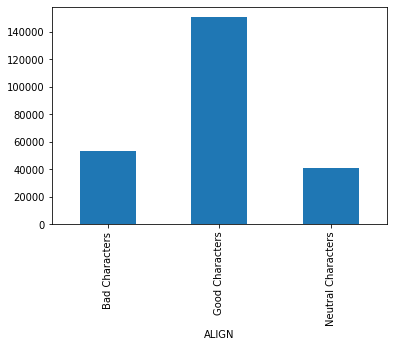

In [194]:
marvel.groupby('ALIGN')['APPEARANCES'].sum().plot(kind='bar')

In [191]:
dc['ALIGN'].unique()

array(['Good Characters', 'Bad Characters', 'Neutral Characters', nan,
       'Reformed Criminals'], dtype=object)

In [196]:
dc = dc.sort_values('YEAR')
dc.groupby('ALIGN')['APPEARANCES'].sum()

ALIGN
Bad Characters         28819.0
Good Characters       100349.0
Neutral Characters     11795.0
Reformed Criminals        89.0
Name: APPEARANCES, dtype: float64

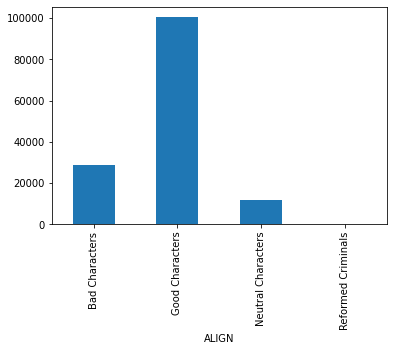

In [197]:
dc.groupby('ALIGN')['APPEARANCES'].sum().plot(kind='bar')

# h.    Why Marvel Keeps their Superhero  Characters Secret.

It is kept hidden from their enemies and the general public to protect themselves from legal ramifications, pressure, or 
public scrutiny,
as well as to protect their friends and loved ones from harm secondary to their actions as superheroes.